### Code-NN
 - It is way similar to tensorflow model but not as tensorflow, tensorflow is more advance than 
    this, but I am improving this a lot that It should compete tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])
y = np.array([0,1,1,0])
y = y.reshape(-1,1)

In [3]:
X.shape,y.shape

((4, 2), (4, 1))

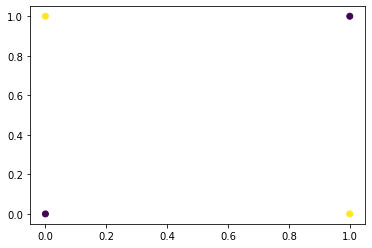

In [4]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [5]:
input_size = 2
layers = [4,3]
output_size = 2
epochs = 10

In [6]:
def ReLu(Z):
    return np.maximum(0,Z)

In [7]:
def softmax(y):
    """
    softmax = e^y(i)/sum(e^y(i))
    """
    
    ea = np.exp(y)
    
    total = ea/np.sum(ea,axis = 1,keepdims=True)
        
    return total

In [ ]:
class NN:
    def __init__(self,hidden_layers,output_layer,input_layer,activation = "relu"):
        model_layers = {}
        self.activation = activation
        total_layers = 1 + len(hidden_layers) + 1
        layers = []
        layers.append(input_layer)
        for i in hidden_layers:
            layers.append(i)
        layers.append(output_layer)
        layers = np.array(layers)
        # layers[0]---input_layer
        #layers[total_layer-1]---output_layer
        for layer_no in range(total_layers-1):
            model_layers[layer_no] = [np.random.randn(layers[layer_no],layers[layer_no+1]),np.zeros((1,layers[layer_no+1]))]
        self.model = model_layers
        
    
    def forward_NeuralNetwork(self,X):
        model  = self.model
        W = []
        b = []
        for key in model.keys():
            W.append(model[key][0])
            b.append(model[key][1])
        W = np.array(W)
        Z = []
        A = []
        for i in range(W.shape[0]):
            if i == 0:
                Z.append(np.dot(X,W[0]) + b[0])
                A.append(np.tanh(Z[0]))
                
            else :
                if i == W.shape[0] - 1:
                    Z.append(np.dot(A[i-1],W[i]) + b[i])
                    A.append(softmax(Z[i]))
                else:
                    Z.append(np.dot(A[i-1],W[i]) + b[i])
                    A.append(np.tanh(Z[i]))
        self.activation_units = (A)
        self.W = (W)
        self.b = (b)
        self.Z = (Z)
        print(self.activation_units)
        return A[-1]
        
    def backward_NeuralNetwork(self,X,y,learning_rate = 0.001):
        model  = self.model
        W = self.W
        b = self.b
        A = self.activation_units
        dZ = []
        db = []
        dW = []
        for i in reversed(range(W.shape[0])):
            if i == W.shape[0] - 1:
                dZ.append(A[i] - y)    
            else:
                if i == 0:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[W.shape[0]-i-2],W[i+1].T) )
                else:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[W.shape[0]-i-2],W[i+1].T) )
                              
        dZ = dZ[::-1]
        for i in range(W.shape[0]):
            if i == W.shape[0] - 1:
                dZ.append(A[i] - y)
                dW.append(np.dot(A[i-1].T,dZ[i]))
                db.append(np.sum(dZ[i],axis = 0))    
            else:
                if i == 0:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[i+1],W[i+1].T) )
                    dW.append(np.dot(X.T,dZ[i]))
                    db.append(np.sum(dZ[i],axis = 0))
                else:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[i+1],W[i+1].T) )
                    dW.append(np.dot(A[i-1].T,dZ[i]))
                    db.append(np.sum(dZ[i],axis = 0))
            
            W[i] -= learning_rate * dW[i]
            b[i] -= learning_rate * db[i]
    
        self.W = W
        self.b = b
        
        
    
    
    